<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Ecommerce-Churn-Assignment" data-toc-modified-id="Ecommerce-Churn-Assignment-1">Ecommerce Churn Assignment</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Data-description" data-toc-modified-id="Data-description-1.0.1">Data description</a></span></li><li><span><a href="#Initialising-the-SparkSession" data-toc-modified-id="Initialising-the-SparkSession-1.0.2">Initialising the SparkSession</a></span></li></ul></li><li><span><a href="#Task-1---Data-Exploration" data-toc-modified-id="Task-1---Data-Exploration-1.1">Task 1 - Data Exploration</a></span></li></ul></li><li><span><a href="#Event-type-funnel-distribution" data-toc-modified-id="Event-type-funnel-distribution-2">Event-type funnel distribution</a></span></li><li><span><a href="#Remember-Spark-dataframe-cannot-be-visualised-directly" data-toc-modified-id="Remember-Spark-dataframe-cannot-be-visualised-directly-3">Remember Spark dataframe cannot be visualised directly</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#The-Event-funnel-is-demonstrated-clearly-in-the-Data.-Many-Products-are-viewed-but-a-much-smaller-fraction-of-them-gets-added-to-the-cart-and-many-products-are-dropped-from-the-cart-and-not-purchased-as-well." data-toc-modified-id="The-Event-funnel-is-demonstrated-clearly-in-the-Data.-Many-Products-are-viewed-but-a-much-smaller-fraction-of-them-gets-added-to-the-cart-and-many-products-are-dropped-from-the-cart-and-not-purchased-as-well.-3.0.1">The Event funnel is demonstrated clearly in the Data. Many Products are viewed but a much smaller fraction of them gets added to the cart and many products are dropped from the cart and not purchased as well.</a></span></li></ul></li><li><span><a href="#Task-2---Feature-Engineering" data-toc-modified-id="Task-2---Feature-Engineering-3.1">Task 2 - Feature Engineering</a></span></li><li><span><a href="#Reason-for-the-action-performed:" data-toc-modified-id="Reason-for-the-action-performed:-3.2">Reason for the action performed:</a></span><ul class="toc-item"><li><span><a href="#The-fraction-of-Null-is-values-is-high-so-its-best-to-remove-them,-so-as-to-not-negatively-impact-the-model" data-toc-modified-id="The-fraction-of-Null-is-values-is-high-so-its-best-to-remove-them,-so-as-to-not-negatively-impact-the-model-3.2.1">The fraction of Null is values is high so its best to remove them, so as to not negatively impact the model</a></span></li></ul></li></ul></li><li><span><a href="#Write-to-intermediate-parquet-file" data-toc-modified-id="Write-to-intermediate-parquet-file-4">Write to intermediate parquet file</a></span></li><li><span><a href="#Picking-up-where-last-left-off" data-toc-modified-id="Picking-up-where-last-left-off-5">Picking up where last left off</a></span></li><li><span><a href="#Read-the-latest-Dataframe" data-toc-modified-id="Read-the-latest-Dataframe-6">Read the latest Dataframe</a></span><ul class="toc-item"><li><span><a href="#Task-3:-Model-Selection" data-toc-modified-id="Task-3:-Model-Selection-6.1">Task 3: Model Selection</a></span><ul class="toc-item"><li><span><a href="#Feature-Transformation" data-toc-modified-id="Feature-Transformation-6.1.1">Feature Transformation</a></span></li></ul></li></ul></li></ul></div>

# Ecommerce Churn Assignment

The aim of the assignment is to build a model that predicts whether a person purchases an item after it has been added to the cart or not. Being a classification problem, you are expected to use your understanding of all the three models covered till now. You must select the most robust model and provide a solution that predicts the churn in the most suitable manner. 

For this assignment, you are provided the data associated with an e-commerce company for the month of October 2019. Your task is to first analyse the data, and then perform multiple steps towards the model building process.

The broad tasks are:
- Data Exploration
- Feature Engineering
- Model Selection
- Model Inference

### Data description

The dataset stores the information of a customer session on the e-commerce platform. It records the activity and the associated parameters with it.

- **event_time**: Date and time when user accesses the platform
- **event_type**: Action performed by the customer
            - View
            - Cart
            - Purchase
            - Remove from cart
- **product_id**: Unique number to identify the product in the event
- **category_id**: Unique number to identify the category of the product
- **category_code**: Stores primary and secondary categories of the product
- **brand**: Brand associated with the product
- **price**: Price of the product
- **user_id**: Unique ID for a customer
- **user_session**: Session ID for a user


### Initialising the SparkSession

The dataset provided is 5 GBs in size. Therefore, it is expected that you increase the driver memory to a greater number. The m4.xlarge instance holds 16 GB memory and we are allocating 14 GB to the driver.

In [1]:
%%configure -f
{ "conf":{
          "spark.pyspark.python": "python3",
          "spark.pyspark.virtualenv.enabled": "true",
          "spark.pyspark.virtualenv.type":"native",
          "spark.pyspark.virtualenv.bin.path":"/usr/bin/virtualenv",
          "spark.driver.memory": "14000M"}
}

ID,YARN Application ID,Kind,State,Spark UI,Driver log,Current session?
0,application_1595397545612_0001,pyspark,idle,Link,Link,


In [2]:
# Initaize spark session
spark.sparkContext.getConf().get('spark.driver.memory')

VBox()

Starting Spark application


ID,YARN Application ID,Kind,State,Spark UI,Driver log,Current session?
1,application_1595397545612_0002,pyspark,idle,Link,Link,✔


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

SparkSession available as 'spark'.


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

'14000M'

In [3]:
# List packages
spark.sparkContext.list_packages()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Package                    Version
-------------------------- -------
beautifulsoup4             4.9.0  
boto                       2.49.0 
jmespath                   0.9.5  
lxml                       4.5.0  
mysqlclient                1.4.2  
nltk                       3.4.5  
nose                       1.3.4  
numpy                      1.16.5 
pip                        9.0.1  
py-dateutil                2.2    
python37-sagemaker-pyspark 1.3.0  
pytz                       2019.3 
PyYAML                     5.3.1  
setuptools                 28.8.0 
six                        1.13.0 
soupsieve                  1.9.5  
wheel                      0.29.0 
windmill                   1.6

In [4]:
# installing required libraries
spark.sparkContext.install_pypi_package("pandas==0.25.1") #Install pandas version 0.25.1 
spark.sparkContext.install_pypi_package("matplotlib", "https://pypi.org/simple") #Install matplotlib from given PyPI repository
spark.sparkContext.install_pypi_package("numpy==1.16.5")

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

  Using cached https://files.pythonhosted.org/packages/7e/ab/ea76361f9d3e732e114adcd801d2820d5319c23d0ac5482fa3b412db217e/pandas-0.25.1-cp37-cp37m-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/d4/70/d60450c3dd48ef87586924207ae8907090de0b306af2bce5d134d78615cb/python_dateutil-2.8.1-py2.py3-none-any.whl

  Using cached https://files.pythonhosted.org/packages/1c/15/3fea1bfb7e5b77b7cca9c6010a9cabc58ea125385345ecb6f5832eb8b49a/matplotlib-3.3.0-1-cp37-cp37m-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/8a/bb/488841f56197b13700afd5658fc279a2025a39e22449b7cf29864669b15d/pyparsing-2.4.7-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/e8/f2/6722dd0c22e3a143ac792ccb2424924ac72af4adea756b1165b4cad50da7/Pillow-7.2.0-cp37-cp37m-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/f7/d2/e07d3ebb2bd7af696440ce7e754c59dd546ffe1bbe732c8ab68b9c834e61/cycler-0.10.0-py2.py3-none-any.whl
  Using

In [5]:
# loading the dataset from S3 - 2019-Oct.csv
df = spark.read.csv("s3a://mlc-c5-assignment/2019-Oct.csv", header = True, inferSchema = True)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [6]:
# exploring the dataframe - top 20 rows
df.show(10)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+----------+----------+-------------------+--------------------+--------+-------+---------+--------------------+
|          event_time|event_type|product_id|        category_id|       category_code|   brand|  price|  user_id|        user_session|
+--------------------+----------+----------+-------------------+--------------------+--------+-------+---------+--------------------+
|2019-10-01 00:00:...|      view|  44600062|2103807459595387724|                null|shiseido|  35.79|541312140|72d76fde-8bb3-4e0...|
|2019-10-01 00:00:...|      view|   3900821|2053013552326770905|appliances.enviro...|    aqua|   33.2|554748717|9333dfbd-b87a-470...|
|2019-10-01 00:00:...|      view|  17200506|2053013559792632471|furniture.living_...|    null|  543.1|519107250|566511c2-e2e3-422...|
|2019-10-01 00:00:...|      view|   1307067|2053013558920217191|  computers.notebook|  lenovo| 251.74|550050854|7c90fc70-0e80-459...|
|2019-10-01 00:00:...|      view|   1004237|205301355563188265

In [7]:
# exploring the dataframe - schema
df.printSchema()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

root
 |-- event_time: string (nullable = true)
 |-- event_type: string (nullable = true)
 |-- product_id: integer (nullable = true)
 |-- category_id: long (nullable = true)
 |-- category_code: string (nullable = true)
 |-- brand: string (nullable = true)
 |-- price: double (nullable = true)
 |-- user_id: integer (nullable = true)
 |-- user_session: string (nullable = true)

In [8]:
# Number of rows and columns in the dataset
df.count(),len(df.columns)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

(42448764, 9)

So, we have a huge dataset that contains 42 million rows.

Now, tha dataset is loaded in Spark environment. Let's proceed with the desired tasks.

<hr>

## Task 1 - Data Exploration

**Find**
- 5 most popular:
    - Products sold by the e-commerce company in the month
    - Brands on the platform
    - Product categories
- Number of unique users and the most active user on the platform
- Average and maximum price for smartphones purchased by the customers
<br>

**Plot and comment**
- Event-type funnel distribution in e-commerce shopping journey
- Traffic on different days of the week

Provide the results in a separate report.

In [9]:
# Event Types
df.select('event_type').distinct().show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+----------+
|event_type|
+----------+
|      cart|
|      view|
|  purchase|
+----------+

In [10]:
from pyspark.sql.functions import when, count, col, countDistinct

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [11]:
# 5 most popular products sold
df.filter(df['event_type'] == 'purchase')\
.select('product_id')\
.groupBy('product_id')\
.count()\
.orderBy('count', ascending = False)\
.show(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+----------+-----+
|product_id|count|
+----------+-----+
|   1004856|28944|
|   1004767|21806|
|   1004833|12697|
|   1005115|12543|
|   4804056|12381|
+----------+-----+
only showing top 5 rows

In [12]:
# 5 most popular brands
df.groupby('brand').count().orderBy('count', ascending=False).show(6)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-------+-------+
|  brand|  count|
+-------+-------+
|   null|6113008|
|samsung|5282775|
|  apple|4122554|
| xiaomi|3083763|
| huawei|1111205|
|lucente| 655861|
+-------+-------+
only showing top 6 rows

In [16]:
# 5 most Number of product categories
df.groupby('category_code').count().orderBy('count', ascending = False).show(6, truncate = False)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+---------------------------+--------+
|category_code              |count   |
+---------------------------+--------+
|null                       |13515609|
|electronics.smartphone     |11507231|
|electronics.clocks         |1311033 |
|computers.notebook         |1137623 |
|electronics.video.tv       |1113750 |
|electronics.audio.headphone|1100188 |
+---------------------------+--------+
only showing top 6 rows

In [13]:
# Number of unique users
df.agg(countDistinct('user_id').alias('distinct_users')).show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------+
|distinct_users|
+--------------+
|       3022290|
+--------------+

In [14]:
# The most active user on the platform
df.groupby('user_id').count().orderBy('count', ascending=False).show(1)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+---------+-----+
|  user_id|count|
+---------+-----+
|512475445| 7436|
+---------+-----+
only showing top 1 row

In [15]:
import pyspark.sql.functions as F

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [16]:
# Average and Maximum price for smartphones purchased by the customers
df.filter((df['category_code'] == 'electronics.smartphone') & (df['event_type'] == 'purchase'))\
.agg(F.max(df['price']), F.avg('price')).show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+----------+-----------------+
|max(price)|       avg(price)|
+----------+-----------------+
|   2110.45|464.6191130945663|
+----------+-----------------+

In [28]:
# Event-type funnel distribution
# Remember Spark dataframe cannot be visualised directly
from pyspark.sql.functions import log
event_df = df.groupby('event_type').count().orderBy('count', ascending = False)\
.select('event_type', (log('count')*100)\
        .alias('log_event_count')).toPandas()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

# Event-type funnel distribution
# Remember Spark dataframe cannot be visualised directly
event_df = df.groupby('event_type').count().orderBy('count', ascending = False).toPandas()

### The Event funnel is demonstrated clearly in the Data. Many Products are viewed but a much smaller fraction of them gets added to the cart and many products are dropped from the cart and not purchased as well.

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

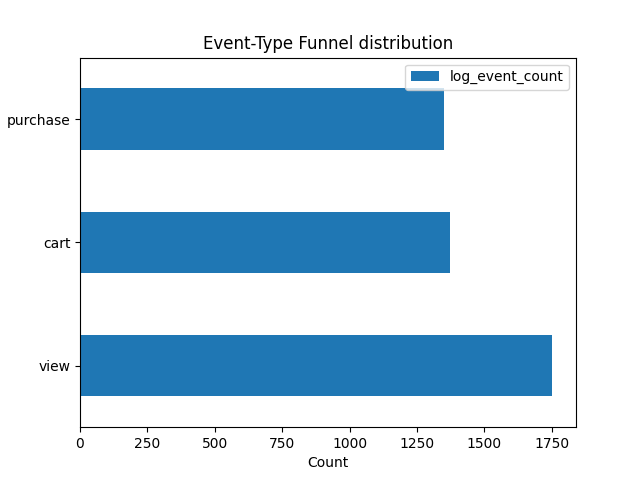

In [30]:
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(14,10))
event_df.plot(y = 'log_event_count', x = 'event_type', kind='barh')
plt.title('Event-Type Funnel distribution')
plt.ylabel('Customer Journey')
plt.xlabel('Count')
%matplot plt


In [19]:
# Traffic on different days of the week
# Remember Spark dataframe cannot be visualised directly
from pyspark.sql.functions import to_timestamp
from pyspark.sql import functions as F

df = df.withColumn('date_time', to_timestamp('event_time', 'yyyy-MM-dd HH:mm:ss'))
df = df.withColumn('day_of_week', F.dayofweek('date_time'))

dow_traffic = df.select('day_of_week')\
.groupby('day_of_week')\
.count()\
.orderBy('day_of_week', ascending = False)\
.toPandas()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

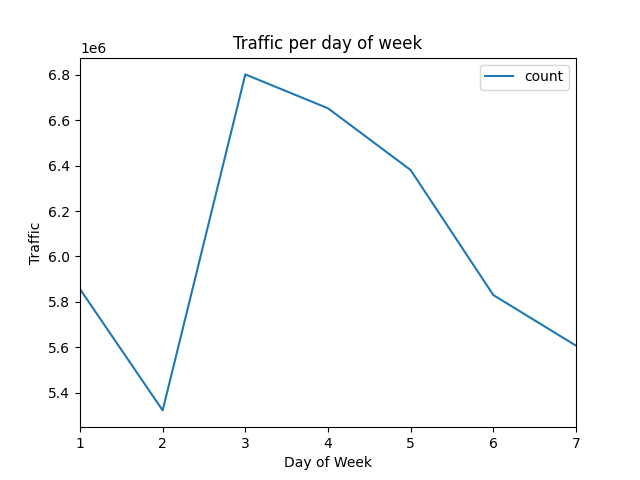

In [20]:
import matplotlib.pyplot as plt
plt.figure(figsize=(14,10))
dow_traffic.plot(y = 'count', x = 'day_of_week')
plt.title('Traffic per day of week')
plt.ylabel('Traffic')
plt.xlabel('Day of Week')
%matplot plt

In [21]:
df.printSchema()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

root
 |-- event_time: string (nullable = true)
 |-- event_type: string (nullable = true)
 |-- product_id: integer (nullable = true)
 |-- category_id: long (nullable = true)
 |-- category_code: string (nullable = true)
 |-- brand: string (nullable = true)
 |-- price: double (nullable = true)
 |-- user_id: integer (nullable = true)
 |-- user_session: string (nullable = true)
 |-- date_time: timestamp (nullable = true)
 |-- day_of_week: integer (nullable = true)

In [22]:
# drop redundant column(s), if any
df = df.drop('event_time')

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

## Task 2 - Feature Engineering

- Handle missing values (provide justification for approach)
- Generate the category code at 2 levels (Split into 2 columns)
    - Example: electronics.video.tv - electronics, video
- Capture user activity in different columns
    - Total activities (view/cart/etc.) in the session
    - Affinity towards a particular product (Product count for user)
    - Affinity towards a category (Secondary category count for user)
    - Average shopping expense for a product category (secondary)
    - Number of user sessions
- Impact of time: Day and Hour (Binning hours into 4 buckets)
- Reduction in brands for analysis: Top 20 + ‘others’
- Target variable generation: is_purchased


In [23]:
# Handling missing values 
from pyspark.sql.functions import when, col, isnull, count, countDistinct

df.select([count(when(isnull(c), c)).alias(c) for c in df.columns]).show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+----------+----------+-----------+-------------+-------+-----+-------+------------+---------+-----------+
|event_type|product_id|category_id|category_code|  brand|price|user_id|user_session|date_time|day_of_week|
+----------+----------+-----------+-------------+-------+-----+-------+------------+---------+-----------+
|         0|         0|          0|     13515609|6113008|    0|      0|           2|        0|          0|
+----------+----------+-----------+-------------+-------+-----+-------+------------+---------+-----------+

In [24]:
# drop the Entries witl null values
df = df.na.drop()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

## Reason for the action performed:
### The fraction of Null is values is high so its best to remove them, so as to not negatively impact the model



In [25]:
# Checking for duplicate entries
df.groupby(df.columns).count().filter("count > 1").count()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

15616

In [26]:
# Number of datapoints after removing Missing values
df.count()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

26560620

In [27]:
# Take required action here
df = df.dropDuplicates()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [28]:
# Number of data points after handling duplicates
df.count()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

26534109

In [29]:
# Generating 2 columns from category code
# Columns have only single entity (electronics.video.tv: electronics, video)
# Check if split command works with '.' or Spark treats it as special character
from pyspark.sql.functions import split

df = df.withColumn('category_1', split(col('category_code'), '\\.').getItem(0))\
.withColumn('category_2', split(col('category_code'), '\\.').getItem(1))

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [30]:
# Activities in a session by the user
# Window functions can be helpful here
from pyspark.sql.window import Window
from pyspark.sql.functions import count
from pyspark.sql.functions import countDistinct

window = Window\
.partitionBy('user_id', 'user_session')\
.orderBy('date_time')\
.rangeBetween(Window.unboundedPreceding, Window.unboundedFollowing)

"""
df.select('user_id', \
          'user_session', \
          'event_type', \
          count('event_type').over(window).alias('event_per_session_count'))\
.show(truncate = False)

"""

df = df.withColumn('event_per_session_count', count('event_type').over(window).alias('event_per_session_count'))

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [31]:
# View count for a product by the user
# Window functions can be helpful here
from pyspark.sql.functions import when

window = Window\
.partitionBy('user_id', 'product_id')\
.orderBy('date_time')\
.rangeBetween(Window.unboundedPreceding, Window.unboundedFollowing)

"""
df.select('user_id', 
          'product_id', 
          'event_type', 
          count(when(df['event_type'] == 'view', 'view').otherwise(0))\
          .over(window).alias('product_view')).show()
"""
df = df.withColumn('product_view', count(when(df['event_type'] == 'view', 'view').otherwise(0))\
          .over(window).alias('product_view'))

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [32]:
# View count for the secondary category by the user
# Window functions can be helpful here
window = Window\
.partitionBy('user_id', 'category_2', 'event_type')\
.orderBy('date_time')\
.rangeBetween(Window.unboundedPreceding, Window.unboundedFollowing)

"""
df.select('user_id', 
          'event_type', 
          'category_2', 
         count(when(df['event_type'] == 'view', 'view').otherwise(0))\
         .over(window).alias('sec_category_view_count')).show()
"""
df = df.withColumn('sec_category_view_count', 
                   count(when(df['event_type'] == 'view', 'view').otherwise(0))\
                   .over(window).alias('sec_category_view_count'))

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [33]:
# Average shopping expense for a product category
# Window functions can be helpful here
from pyspark.sql.functions import avg

window = Window\
.partitionBy('user_id', 'category_2', 'event_type')\
.orderBy('date_time')\
.rangeBetween(Window.unboundedPreceding, Window.unboundedFollowing)

"""
temp = df.select('category_2',
        'user_id', 
        'price',
        'event_type',
        'product_id',
        avg(when(df['event_type'] == 'purchase', df['price']).otherwise(df['price']))\
        .over(window).alias('avg_expense'))
"""
df = df.withColumn('avg_expense', 
              avg(when(df['event_type'] == 'purchase', df['price']).otherwise(0))\
              .over(window).alias('avg_expense'))


VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [34]:
# Session count for a user
# Window functions can be helpful here
from pyspark.sql.functions import approx_count_distinct
window = Window\
.partitionBy('user_id')\
.orderBy('date_time')\
.rangeBetween(Window.unboundedPreceding, Window.unboundedFollowing)

"""
df.filter(df['user_id'] == '316488816')\
.select('user_id', 
        'user_session', 
        approx_count_distinct('user_session').over(window).alias('distinct_sessions')).show(truncate = False)
"""

df = df.withColumn('distinct_session', 
                   approx_count_distinct('user_session')\
                  .over(window).alias('distinct_session'))

#df.select('user_id', 'user_session', 'distinct_session').show(10)


VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [35]:
#
df.show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+----------+----------+-------------------+--------------------+------+------+---------+--------------------+-------------------+-----------+-----------+-----------+-----------------------+------------+-----------------------+-----------+----------------+
|event_type|product_id|        category_id|       category_code| brand| price|  user_id|        user_session|          date_time|day_of_week| category_1| category_2|event_per_session_count|product_view|sec_category_view_count|avg_expense|distinct_session|
+----------+----------+-------------------+--------------------+------+------+---------+--------------------+-------------------+-----------+-----------+-----------+-----------------------+------------+-----------------------+-----------+----------------+
|      view|   1201231|2172371436436455782|  electronics.tablet|huawei|102.42|316488816|78e96a60-4b88-4df...|2019-10-04 10:28:10|          6|electronics|     tablet|                      2|           1|                      2|      

# Write to intermediate parquet file

In [36]:
df.write.option("header", "true").parquet("s3://shiva-test-bucket-2/critical_df.parquet")


VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

# Picking up where last left off

In [3]:
df = spark.read.parquet("s3://shiva-test-bucket-2/critical_df.parquet")

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [4]:
# Import the hour function
from pyspark.sql.functions import hour

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [5]:
# Generating the hour variable
df = df.withColumn('Hour', hour('date_time'))

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [6]:
# Binning the hours into 5 zones, 2 zones come under NIGHT
from pyspark.ml.feature import Bucketizer
split_list = [0, 5, 12, 17, 20, 24]
bucketizer = Bucketizer(splits = split_list,
                       inputCol = 'Hour',
                       outputCol = 'part_of_day')
df = bucketizer.setHandleInvalid('keep').transform(df)


VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [7]:
# Creating another variable 'time_of_day' to map the bins to a time of day
from pyspark.sql.functions import udf
from pyspark.sql.types import *

time_of_day_map = {0.0:'night', 1.0:'morning', 2.0:'afternoon', 3.0:'evening', 4.0:'night'}
UDF = udf(lambda x: time_of_day_map[x], StringType())
df = df.withColumn("time_of_day", UDF("part_of_day"))

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [ ]:
#
# df.show()

In [8]:
# Reduction in brands for analysis: Top 20 + ‘others'
from pyspark.sql.functions import col, sum, when
from pyspark.sql import Window

window = Window\
.partitionBy('brand', 'event_type')\
.orderBy('date_time')\
.rangeBetween(Window.unboundedPreceding, Window.unboundedFollowing)

"""
temp = df.select('category_2',
        'user_id', 
        'price',
        'event_type',
        'product_id',
        avg(when(df['event_type'] == 'purchase', df['price']).otherwise(df['price']))\
        .over(window).alias('avg_expense'))
"""

df_inter = df.select('brand', 'event_type', 'price', \
          sum(when(df['event_type']  == 'purchase', \
                   df['price']).otherwise(0))\
          .over(window).alias('revenue'))\
.orderBy('revenue', ascending  = False)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [9]:
df_inter = df_inter.drop('price', 'event_type')
df_inter = df_inter.dropDuplicates()
# temp.show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [10]:
top_brands_collect = df_inter.select('brand', 'revenue').orderBy('revenue', ascending = False).collect()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [11]:
# All the unique brands in descending order of revenue includuing brands with 0 revenue
top_brands_list = [row.brand for row in top_brands_collect]

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [12]:
unique_brands = []
for i in top_brands_list:
    if i not in unique_brands:
        unique_brands.append(i)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [13]:
top_20_brands = unique_brands[:20]
other_brands = unique_brands[20:] 

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [14]:
# Create Brand Map
brand_map = {other_brands[i]: 'others' for i in range(len(other_brands))}
brand_map.update({top_20_brands[i]: top_20_brands[i] for i in range(len(top_20_brands))})

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [15]:
# Create New feature mapping top_20_brands and all other brands
from pyspark.sql.functions import udf

UDF = udf(lambda x: brand_map[x], StringType())
df = df.withColumn('top_brands', UDF('brand'))

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [16]:
# Generating 'is_purchased' variable
# use lag function with Window function

from pyspark.sql.functions import lag, when
from pyspark.sql import Window

window = Window\
.partitionBy('user_id')\
.orderBy('date_time')

"""
df.select('event_type', lag('event_type')\
          .over(window).alias('last_event_type')).show()
"""

df = df.withColumn('last_event_type', lag('event_type')\
          .over(window).alias('last_event_type'))

# Generating "is_purchased" (target) variable
df = df.withColumn('is_purchased', 
                    when((col('last_event_type') == 'cart') 
                         & (col('event_type') == 'purchase'), 1)\
                   .otherwise(0))

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [17]:
# Dropping the redundant columns 

df = df.drop('event_type', 'product_id',
              'category_id', 'category_code', 'brand',
              'user_id', 'user_session',
              'date_time', 'part_of_day', 'last_event_type', 'price')

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [18]:
# Dropping redundant rows
df = df.dropDuplicates()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [57]:
# Printing the top 20 rows as output
# df.show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-------+-----------+-----------+-----------+-----------------------+------------+-----------------------+-----------+----------------+----+-----------+----------+------------+
|  price|day_of_week| category_1| category_2|event_per_session_count|product_view|sec_category_view_count|avg_expense|distinct_session|Hour|time_of_day|top_brands|is_purchased|
+-------+-----------+-----------+-----------+-----------------------+------------+-----------------------+-----------+----------------+----+-----------+----------+------------+
| 722.72|          5|electronics| smartphone|                      4|           2|                     13|        0.0|               4|   3|      night|     apple|           0|
| 329.22|          6|electronics| smartphone|                     21|           3|                     21|        0.0|               1|  18|    evening|    xiaomi|           0|
|  123.3|          1|electronics| smartphone|                     64|           2|                    232|        0

In [ ]:
# Write df_final to S3
# df.write.option("header", "true").parquet("s3://shiva-test-bucket-2/ecommerce_df_final.parquet")

In [54]:
# Columns in df after feature engineering
df.printSchema()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

root
 |-- price: double (nullable = true)
 |-- day_of_week: integer (nullable = true)
 |-- category_1: string (nullable = true)
 |-- category_2: string (nullable = true)
 |-- event_per_session_count: long (nullable = true)
 |-- product_view: long (nullable = true)
 |-- sec_category_view_count: long (nullable = true)
 |-- avg_expense: double (nullable = true)
 |-- distinct_session: long (nullable = true)
 |-- Hour: integer (nullable = true)
 |-- time_of_day: string (nullable = true)
 |-- top_brands: string (nullable = true)
 |-- is_purchased: integer (nullable = false)

<hr>

# Read the latest Dataframe

In [21]:
#df = spark.read.parquet("s3://shiva-test-bucket-2/NOTEBOOK_2.parquet")

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

## Task 3: Model Selection
3 models for classification:	
- Logistic Regression
- Decision Tree
- Random Forest

### Feature Transformation

In [19]:
# Check if only the required columns are present to build the model
# If not, drop the redundant columns
df.printSchema()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

root
 |-- day_of_week: integer (nullable = true)
 |-- category_1: string (nullable = true)
 |-- category_2: string (nullable = true)
 |-- event_per_session_count: long (nullable = true)
 |-- product_view: long (nullable = true)
 |-- sec_category_view_count: long (nullable = true)
 |-- avg_expense: double (nullable = true)
 |-- distinct_session: long (nullable = true)
 |-- Hour: integer (nullable = true)
 |-- time_of_day: string (nullable = true)
 |-- top_brands: string (nullable = true)
 |-- is_purchased: integer (nullable = false)

In [20]:
df = df.drop('Hour')

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [21]:
from pyspark.sql.types import *

df = df.withColumn('day_of_week_d', df['day_of_week'].cast(DoubleType()))
df = df.withColumn('product_view_d', df['product_view'].cast(DoubleType()))
df = df.withColumn('event_per_session_count_d', df['event_per_session_count'].cast(DoubleType()))
df = df.withColumn('sec_category_view_count_d', df['sec_category_view_count'].cast(DoubleType()))
df = df.withColumn('distinct_session_d', df['distinct_session'].cast(DoubleType()))

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [22]:
# Categorising the attributes into its type - Continuous and Categorical
continuous_variables = ['event_per_session_count_d',
                       'product_view_d', 'sec_category_view_count_d',
                       'avg_expense', 'distinct_session_d',]

categorical_variables = ['category_1',
                         'category_2', 'time_of_day',
                        'top_brands']

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [23]:
df.printSchema()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

root
 |-- day_of_week: integer (nullable = true)
 |-- category_1: string (nullable = true)
 |-- category_2: string (nullable = true)
 |-- event_per_session_count: long (nullable = true)
 |-- product_view: long (nullable = true)
 |-- sec_category_view_count: long (nullable = true)
 |-- avg_expense: double (nullable = true)
 |-- distinct_session: long (nullable = true)
 |-- time_of_day: string (nullable = true)
 |-- top_brands: string (nullable = true)
 |-- is_purchased: integer (nullable = false)
 |-- day_of_week_d: double (nullable = true)
 |-- product_view_d: double (nullable = true)
 |-- event_per_session_count_d: double (nullable = true)
 |-- sec_category_view_count_d: double (nullable = true)
 |-- distinct_session_d: double (nullable = true)

In [24]:
df = df.drop('day_of_week', 'product_view', 'event_per_session_count', 'distinct_session', 'sec_category_view_count')

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [25]:
df.printSchema()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

root
 |-- category_1: string (nullable = true)
 |-- category_2: string (nullable = true)
 |-- avg_expense: double (nullable = true)
 |-- time_of_day: string (nullable = true)
 |-- top_brands: string (nullable = true)
 |-- is_purchased: integer (nullable = false)
 |-- day_of_week_d: double (nullable = true)
 |-- product_view_d: double (nullable = true)
 |-- event_per_session_count_d: double (nullable = true)
 |-- sec_category_view_count_d: double (nullable = true)
 |-- distinct_session_d: double (nullable = true)

In [26]:
# Feature transformation for categorical features
from pyspark.ml.feature import StringIndexer
from pyspark.ml.feature import OneHotEncoderEstimator

stages = []
for categoricalCol in categorical_variables:
    string_indexer = StringIndexer(inputCol = categoricalCol, outputCol = categoricalCol+'_index')
    encoder = OneHotEncoderEstimator(inputCols = [string_indexer.getOutputCol()], 
                                     outputCols = [categoricalCol+'_vec'])
    stages += [string_indexer, encoder]
    
another_encoder = OneHotEncoderEstimator(inputCols = ['day_of_week_d'], outputCols = ['day_of_week_d_vec'])
stages += [another_encoder]


VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [27]:
# Encode target variable
label_stringIdx = StringIndexer(inputCol = 'is_purchased', outputCol = 'label')
stages += [label_stringIdx]

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [28]:
# Vector assembler to combine all the features
from pyspark.ml.feature import VectorAssembler

assembler_input = [c+'_vec' for c in categorical_variables] + continuous_variables
assembler = VectorAssembler(inputCols = assembler_input, outputCol = 'features')
stages += [assembler]

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [29]:
# Pipeline for the tasks
from pyspark.ml import Pipeline

pipeline = Pipeline(stages = stages)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [30]:
# Transforming the dataframe df
pipeline_model = pipeline.fit(df)
df = pipeline_model.transform(df)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [31]:
# Schema of the transformed df
df.printSchema()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

root
 |-- category_1: string (nullable = true)
 |-- category_2: string (nullable = true)
 |-- avg_expense: double (nullable = true)
 |-- time_of_day: string (nullable = true)
 |-- top_brands: string (nullable = true)
 |-- is_purchased: integer (nullable = false)
 |-- day_of_week_d: double (nullable = true)
 |-- product_view_d: double (nullable = true)
 |-- event_per_session_count_d: double (nullable = true)
 |-- sec_category_view_count_d: double (nullable = true)
 |-- distinct_session_d: double (nullable = true)
 |-- category_1_index: double (nullable = false)
 |-- category_1_vec: vector (nullable = true)
 |-- category_2_index: double (nullable = false)
 |-- category_2_vec: vector (nullable = true)
 |-- time_of_day_index: double (nullable = false)
 |-- time_of_day_vec: vector (nullable = true)
 |-- top_brands_index: double (nullable = false)
 |-- top_brands_vec: vector (nullable = true)
 |-- day_of_week_d_vec: vector (nullable = true)
 |-- label: double (nullable = false)
 |-- features

In [32]:
df.select('features').show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+
|            features|
+--------------------+
|(96,[0,14,70,72,9...|
|(96,[0,12,69,73,9...|
|(96,[0,12,73,91,9...|
|(96,[0,12,68,75,9...|
|(96,[3,58,69,71,9...|
|(96,[0,12,68,72,9...|
|(96,[0,12,69,75,9...|
|(96,[8,31,68,71,9...|
|(96,[0,26,70,88,9...|
|(96,[0,26,70,71,9...|
|(96,[0,12,73,91,9...|
|(96,[5,13,69,71,9...|
|(96,[0,14,68,74,9...|
|(96,[0,24,69,72,9...|
|(96,[5,13,68,71,9...|
|(96,[0,12,77,91,9...|
|(96,[1,38,68,71,9...|
|(96,[8,31,70,71,9...|
|(96,[0,16,68,72,9...|
|(96,[0,16,69,76,9...|
+--------------------+
only showing top 20 rows

In [34]:
# Checking the elements of the transformed df - Top 20 rows
df.show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-------+-----------+-----------+-----------------------+-----------------------+-----------+----------------+-----------+----------+------------+-------------+--------------+----------------+--------------+----------------+---------------+-----------------+---------------+----------------+---------------+-----------------+--------------------+
|  price| category_1| category_2|event_per_session_count|sec_category_view_count|avg_expense|distinct_session|time_of_day|top_brands|is_purchased|day_of_week_d|product_view_d|category_1_index|category_1_vec|category_2_index| category_2_vec|time_of_day_index|time_of_day_vec|top_brands_index| top_brands_vec|day_of_week_d_vec|            features|
+-------+-----------+-----------+-----------------------+-----------------------+-----------+----------------+-----------+----------+------------+-------------+--------------+----------------+--------------+----------------+---------------+-----------------+---------------+----------------+---------------

In [33]:
# Storing the transformed df in S3 bucket to prevent repetition of steps again
df.write.option("header", "true").parquet("s3://shiva-test-bucket-2/NOTEBOOK_1_V2.parquet")

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Proceed to another notebooks after saving the dataframe.